## Практическое занятие №3


### Часть 1
Привести примеры кода, которые соответствуют следующим нарушениям PEP 8:
Для быстрой проверки используйте сайт pep8online.com.


* whitespace before '('

Плохо

In [6]:
print ('E211')

E211


Хорошо

In [7]:
print('not E211')

not E211


* missing whitespace around operator

Плохо

In [8]:
if 10<15:
  print('E225')

E225


Хорошо

In [9]:
if 10 < 17:
  print('not E225')

not E225


* missing whitespace after ','

Плохо

In [13]:
error = ['E','2','3','1']
error

['E', '2', '3', '1']

Хорошо

In [15]:
not_error = ['not', 'E231']
not_error

['not', 'E231']

* unexpected spaces around keyword / parameter equals

Плохо

In [20]:
def error_func(a = 'E',
               b = '2',
               c = '5',
               d = '1'):
  return a, b, c, d
error_func()

('E', '2', '5', '1')

Хорошо

In [21]:
def func(a='no',
         b='problem'):
  return a, b

func()

('no', 'problem')

* expected 2 blank lines, found 1

Плохо

In [25]:
def f1():
  return "It's E302"
def f2():
  pass

f1()

"It's E302"

Хорошо

In [27]:
def f1():
  pass

def f2():
  return 'No problem'

f2()

'No problem'

* multiple statements on one line (colon)

Плохо

In [28]:
if True: print("It's E701")

It's E701


Хорошо

In [29]:
if True:
  print('Okay')

Okay


* multiple statements on one line (semicolon)

Плохо

In [31]:
from math import sin; sin(1/2)

0.479425538604203

Хорошо

In [32]:
from math import sin
sin(1/2)

0.479425538604203

* comparison to None should be 'if cond is None:'

Плохо

In [34]:
if 1 != False:
  print('E711')

E711


Хорошо

In [38]:
if type(0) is int:
  print("Okay then")

Okay then


* comparison to True should be 'if cond is True:' or 'if cond:'

Плохо

In [39]:
x = True
if x == True:
  print('E712')

E712


Хорошо

In [40]:
if x:
  print("It's okay")

It's okay


Неконтролируемый импорт с помощью *, как известно, в Питоне не поощряется. Попробуйте сделать его контролируемым со стороны модуля. Чтобы использование звездочки приводило к импорту пользователю только определенного круга имен вашего модуля. - Решение в папке Test Import



Реализовать модель сегрегации Шеллинга в Matplotlib. На двумерной сетке находятся агенты двух групп. На каждой клетке может находиться не более 1 агента. Агент "счастлив", если, как минимум, заданный процент ближайших соседей относится к его группе. В противном случае агент переезжает на иное, свободное место.

Ввести следующие параметры: размер популяции, размеры сетки, процентное соотношение агентов двух групп, пороговое значение "толерантности", количество шагов моделирования.

Реализовать отображение агентов в виде квадратов двух цветов на целочисленной сетке.
Случайно разместить агентов, учитывая запрет на совпадение координат.
Реализовать функцию distance на основе метрики манхэттенского расстояния.
Реализовать функцию is_happy.
Изобразить график исходного расположения агентов и график расположения спустя N шагов моделирования.
Изобразить график изменения состояния "настроения" агентов.
(повышенной сложности) Реализовать анимацию шагов моделирования. (Решение в папке Шеллинг)

# Часть 2


В следующих задачах визуализация данных используется для нахождения ответов на простые вопросы. В каждом конкретном случае необходимо предложить предпочтительный метод визуализации в Matplotlib. Приветствуются идеи для обнаружения новых фактов из данных.

Проанализировать данные, полученные от почтового робота:

In [254]:
import json
import email.utils

with open('/content/table.json', encoding='utf8') as f:
    table = json.loads(f.read()) # Таблица решений задач
    
with open('/content/failed.json', encoding='utf8') as f:
    failed = json.loads(f.read()) # Данные по ошибкам
    
with open('/content/messages.json', encoding='utf8') as f:
    messages = json.loads(f.read()) # Полученные сообщения

Разберемся с датасетом

In [255]:
messages[:5]

[{'date': 'Sun, 14 Feb 2021 21:00:17 +0300', 'subj': 'к20 7'},
 {'date': 'Sun, 14 Feb 2021 21:53:03 +0300', 'subj': 'к20 7'},
 {'date': 'Sun, 14 Feb 2021 21:54:19 +0300', 'subj': 'к20 7'},
 {'date': 'Sun, 14 Feb 2021 22:10:59 +0300', 'subj': 'к20 7'},
 {'date': 'Mon, 15 Feb 2021 09:34:30 +0300', 'subj': 'н5 10'}]

In [256]:
messages = [(m['subj'].upper(), email.utils.parsedate(m['date'])) for m in messages]
print(messages[0])

('К20 7', (2021, 2, 14, 21, 0, 17, 0, 1, -1))


In [257]:
print(len(messages))

3900


Формат данных 'Группа Номер_студента', 'Год Месяц Число Часы Минуты Секунды (баллы)'

#### Как по времени суток распределяется активность студентов?

Здесь не нужны данные о том, кто проявил активность.

In [258]:
(messages[0][1][0])

2021

In [259]:
dates = []
times = []
for i in range(0, len(messages)):
  dates.append(list(messages[i][1][0:3]))
  times.append(list(messages[i][1][3:6]))

print(dates[:5])
print(times[:5])
print(len(dates))

[[2021, 2, 14], [2021, 2, 14], [2021, 2, 14], [2021, 2, 14], [2021, 2, 15]]
[[21, 0, 17], [21, 53, 3], [21, 54, 19], [22, 10, 59], [9, 34, 30]]
3900


In [260]:
# find the count of students, working with our bot every hour
activities = []
for i in range(24):
  activities.append(0)

for i in range(0, len(times)):
  hour = times[i][0]
  activities[hour] += 1

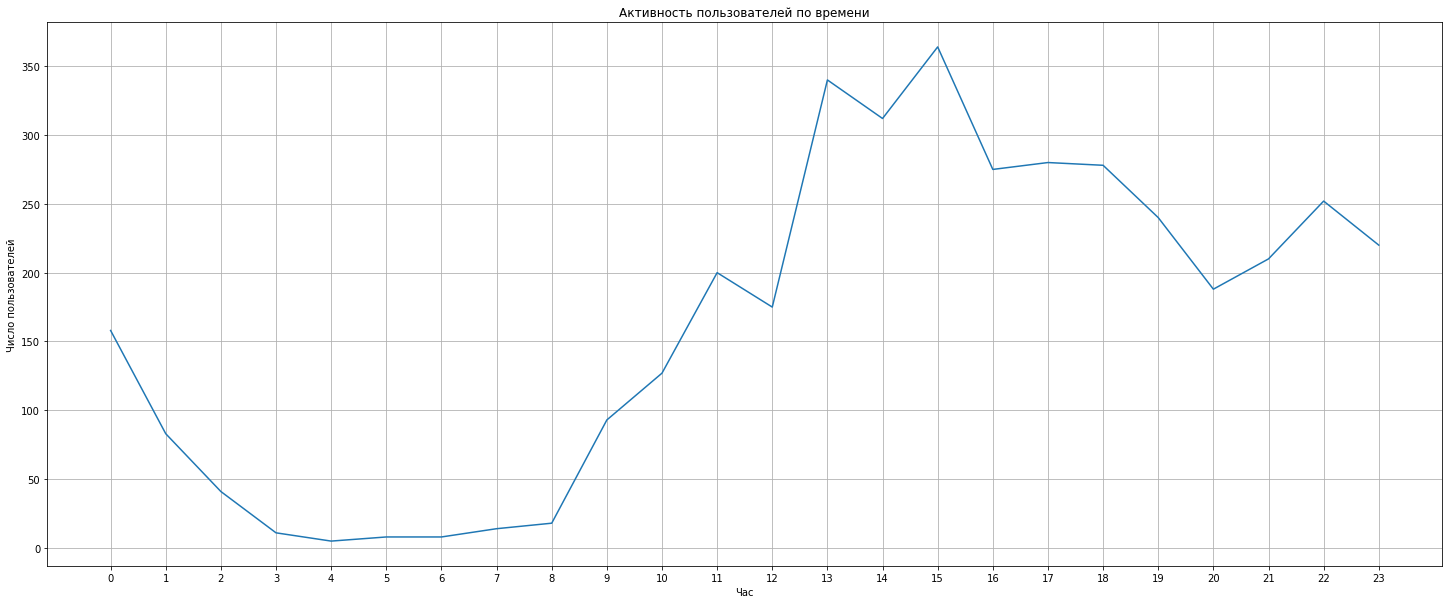

In [261]:
y = [act for act in activities]
x = [time for time in range(24)]

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(0, 24, 1)) 
ax.grid()

plt.plot(x,y)
plt.xlabel('Час')
plt.ylabel('Число пользователей')
plt.title('Активность пользователей по времени')
plt.show()

#### Как по дням недели распределяется активность студентов?

In [232]:
# find the count of students, working with our bot every day
datetimes = []
for i in range(len(messages)):
  datetimes.append(messages[i][1][0:6])


activities = []
for i in range(7):
  activities.append(0)

for i in range(0, len(datetimes)):
  day = datetime.datetime(datetimes[i][0], datetimes[i][1], datetimes[i][2], datetimes[i][3], datetimes[i][4], datetimes[i][5]).weekday()
  activities[day] += 1

In [233]:
activities

[835, 707, 602, 538, 453, 388, 377]

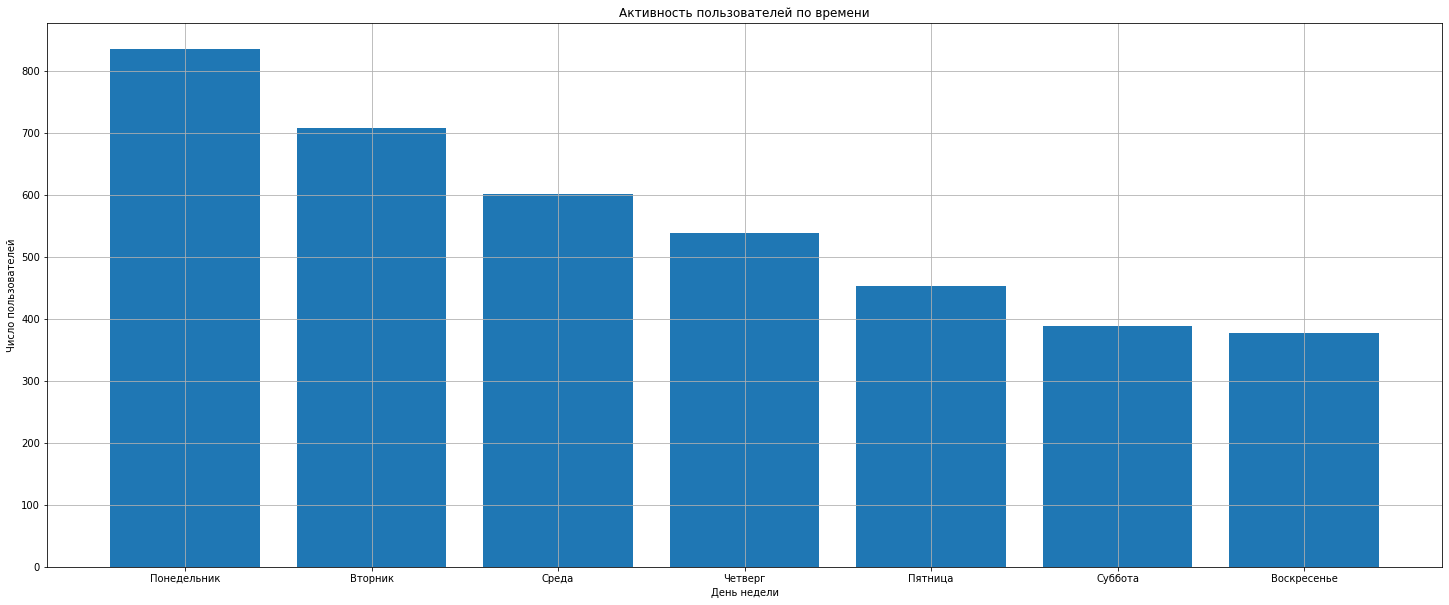

In [238]:
y = [act for act in activities]
x = [time for time in ['Понедельник', 'Вторник', 'Среда' , 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']]

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(0, 7, 1)) 
ax.grid()

plt.bar(x,y)
plt.xlabel('День недели')
plt.ylabel('Число пользователей')
plt.title('Активность пользователей по времени')
plt.show()

In [17]:
!wget https://raw.githubusercontent.com/SunnyientDev/Stepik_New_Courses/master/Python_course/pract3/failed.json
!wget https://raw.githubusercontent.com/SunnyientDev/Stepik_New_Courses/master/Python_course/pract3/messages.json
!wget https://raw.githubusercontent.com/SunnyientDev/Stepik_New_Courses/master/Python_course/pract3/table.json

--2021-03-24 10:42:40--  https://raw.githubusercontent.com/SunnyientDev/Stepik_New_Courses/master/Python_course/pract3/failed.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76873 (75K) [text/plain]
Saving to: ‘failed.json.1’

failed.json.1       100%[===================>]  75.07K  --.-KB/s    in 0.01s   

2021-03-24 10:42:41 (5.42 MB/s) - ‘failed.json.1’ saved [76873/76873]

--2021-03-24 10:42:41--  https://raw.githubusercontent.com/SunnyientDev/Stepik_New_Courses/master/Python_course/pract3/messages.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaitin

In [18]:
import json
import email.utils

with open('/content/table.json', encoding='utf8') as f:
    table = json.loads(f.read()) # Таблица решений задач
    
with open('/content/failed.json', encoding='utf8') as f:
    failed = json.loads(f.read()) # Данные по ошибкам
    
with open('/content/messages.json', encoding='utf8') as f:
    messages = json.loads(f.read()) # Полученные сообщения

messages = [(m['subj'].upper(), email.utils.parsedate(m['date'])) for m in messages]
print(messages[0])

('К20 7', (2021, 2, 14, 21, 0, 17, 0, 1, -1))


#### В каких группах было отправлено больше всего сообщений?

In [36]:
group_list = []
for i in range(len(messages)):
  temp = messages[i][0].split()
  group_list.append(temp[0])

group_list = list(set(group_list))
count_list = []
for i in range(len(group_list)):
  count_list.append(0)
group_list.sort()

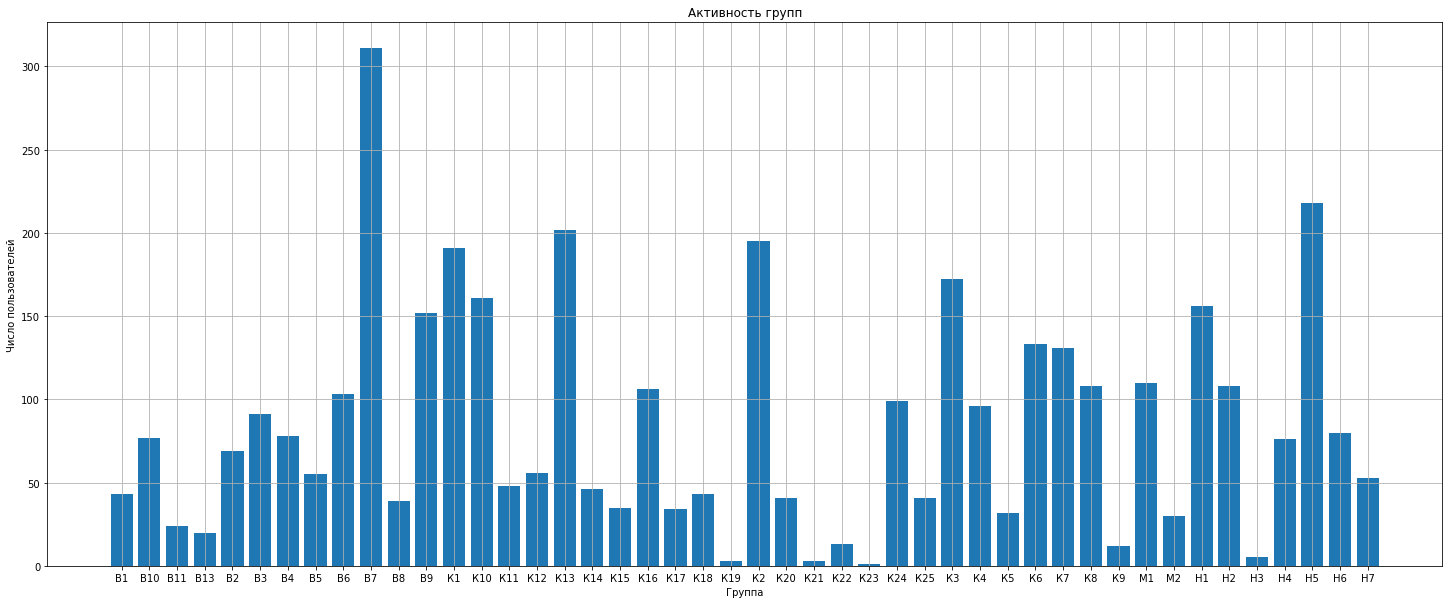

In [37]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(messages)):
  temp = messages[i][0].split()
  for j in range(len(group_list)):
    if temp[0] == group_list[j]:
      count_list[j] += 1

y = [count for count in count_list]
x = [group for group in group_list]

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(0, len(group_list), 1)) 
ax.grid()

plt.bar(x,y)
plt.xlabel('Группа')
plt.ylabel('Число пользователей')
plt.title('Активность групп')
plt.show()

#### В каких группах было получено больше всего правильных решений?

Время опять разбираться с данными

In [49]:
table.keys()

dict_keys(['data', 'time'])

Заметим, что словарь table состоит из двух полей: данные и время. Время - это дата бэкапа таблицы, оно нам не нужно

In [59]:
table['time']

'Sun Mar  7 16:04:30 2021'

Определять число правильных решений будем именно по этой таблице

In [61]:
table['data'][:5]

[['К20', 7, 'f12', 1],
 ['К20', 7, 'f11', 1],
 ['К20', 7, 'f14', 1],
 ['К20', 21, 'f11', 1],
 ['К20', 21, 'f12', 1]]

In [70]:
group_list[:5]

['В1', 'В10', 'В11', 'В13', 'В2']

In [72]:
kis_table = table['data']
solving_score = []
for i in range(len(group_list)):
  solving_score.append(0)

for i in range(len(kis_table)):
  for j in range(len(group_list)):
    if kis_table[i][3] == 1 and kis_table[i][0] == group_list[j]:
      solving_score[j] += 1

solving_score[:5]

[45, 59, 15, 25, 85]

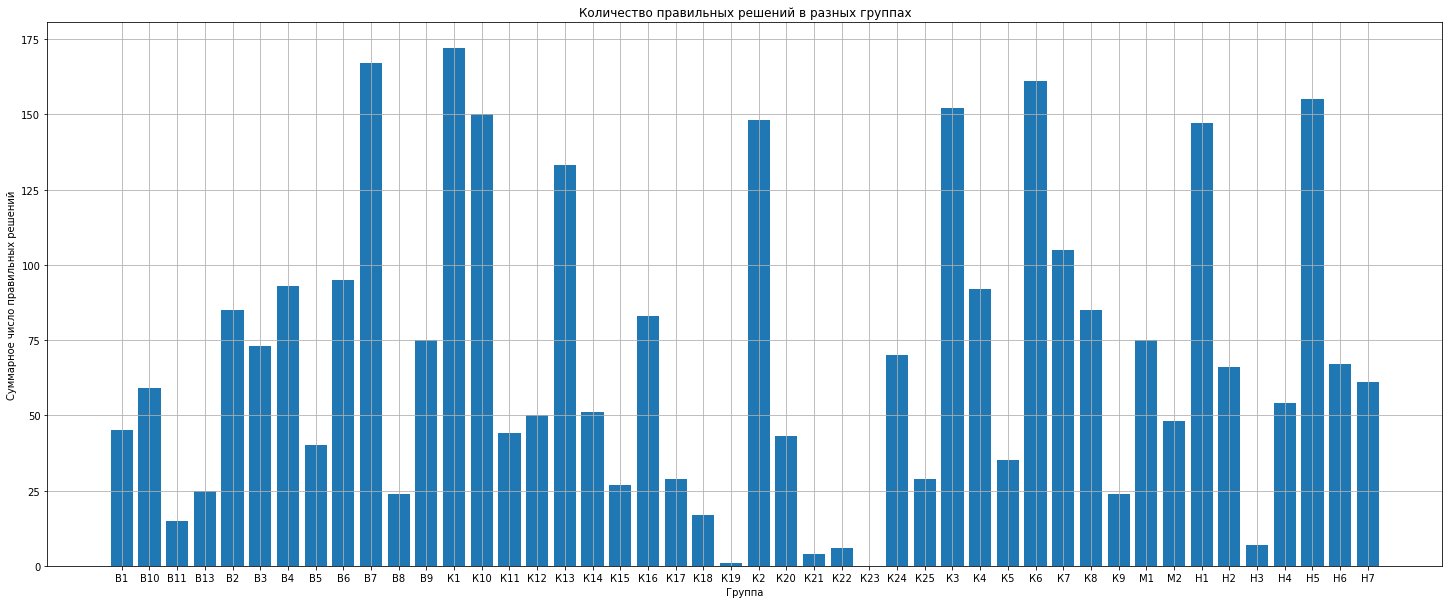

In [74]:
y = [solve for solve in solving_score]
x = [group for group in group_list]

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(0, len(group_list), 1)) 
ax.grid()

plt.bar(x,y)
plt.xlabel('Группа')
plt.ylabel('Суммарное число правильных решений')
plt.title('Количество правильных решений в разных группах')
plt.show()

#### Какие задачи оказались самыми легкими, самыми сложными?

Будем анализировать по той же таблице, найдем суммарное число решений по каждой задачe

In [78]:
kis_table[:5]

[['К20', 7, 'f12', 1],
 ['К20', 7, 'f11', 1],
 ['К20', 7, 'f14', 1],
 ['К20', 21, 'f11', 1],
 ['К20', 21, 'f12', 1]]

In [99]:
tasks = ['f11', 'f12', 'f13', 'f21', 'f22', 'f23']
kis_table = table['data']
count_list_all = []
count_list_1 = []

for i in range(len(tasks)):
  count_list_all.append(0)
  count_list_1.append(0)

for i in range(len(kis_table)):
  for j in range(len(tasks)):
    if kis_table[i][2] == tasks[j]:
      count_list_all[j] += 1

for i in range(len(kis_table)):
  for j in range(len(tasks)):
    if kis_table[i][2] == tasks[j] and kis_table[i][3] == 1:
      count_list_1[j] += 1

print('Общее число решений')
print('{: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7}'.format('f11', 'f12', 'f13', 'f21', 'f22', 'f23'))
print('{: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7}'.format(count_list_all[0], count_list_all[1], count_list_all[2], count_list_all[3], count_list_all[4], count_list_all[5]))
print('Общее число верных решений')
print('{: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7}'.format('f11', 'f12', 'f13', 'f21', 'f22', 'f23'))
print('{: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7} | {: ^7}'.format(count_list_1[0], count_list_1[1], count_list_1[2], count_list_1[3], count_list_1[4], count_list_1[5]))

Общее число решений
  f11   |   f12   |   f13   |   f21   |   f22   |   f23  
  608   |   608   |   608   |   411   |   370   |   295  
Общее число верных решений
  f11   |   f12   |   f13   |   f21   |   f22   |   f23  
  573   |   559   |   573   |   364   |   303   |   245  


<Figure size 720x720 with 0 Axes>

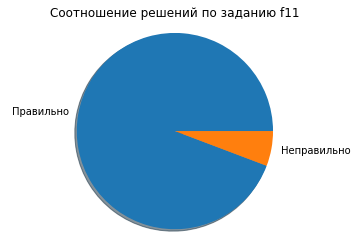

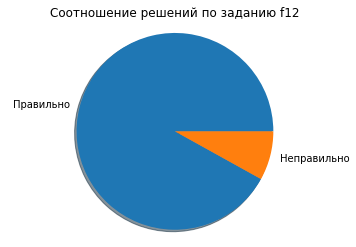

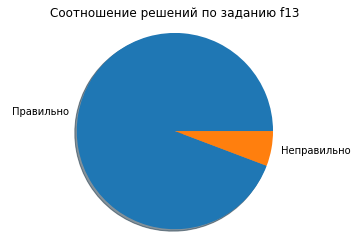

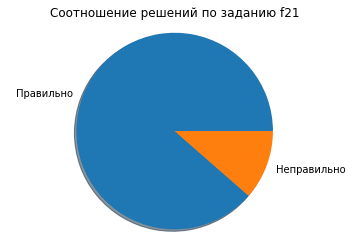

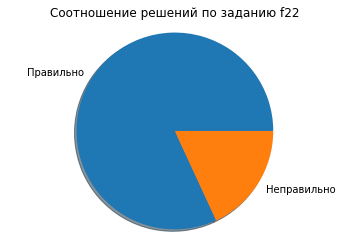

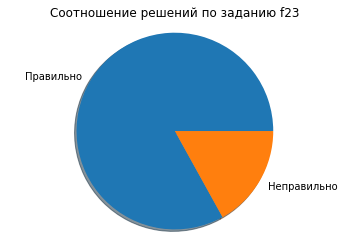

In [129]:
fig = plt.figure(figsize=(10, 10))

for i in range(len(tasks)):
  vals = [count_list_1[i], count_list_all[i]-count_list_1[i]]
  labels = ['Правильно', 'Неправильно']
  fig, ax = plt.subplots()
  plt.title('Соотношение решений по заданию ' + tasks[i])
  ax.pie(vals, labels=labels, shadow=True)
  ax.axis("equal")

#### Какие распространенные ошибки совершали студенты?

Для решения этого задания воспользуемся данными из таблицы failed

In [137]:
print(type(failed))
print(failed.keys())
print(failed['В1 1'])
print(failed['Н5 10'])

<class 'dict'>
dict_keys(['Н5 10', 'К13 7', 'К13 16', 'К13 12', 'К5 1', 'К13 2', 'К5 27', 'К13 5', 'К13 27', 'Н5 25', 'К10 15', 'К4 26', 'К13 15', 'К13 11', 'Н5 7', 'К7 8', 'К4 24', 'К1 3', 'К7 19', 'К7 28', 'К2 25', 'В3 14', 'В7 25', 'В7 10', 'В9 22', 'В7 7', 'К6 18', 'В11 4', 'В10 30', 'В7 18', 'В10 31', 'В6 4', 'В11 25', 'В11 27', 'В10 7', 'В3 22', 'В9 5', 'В7 4', 'Н5 22', 'Н5 18', 'К3 24', 'Н5 24', 'К3 6', 'К2 17', 'В9 15', 'К2 26', 'К2 7', 'Н2 28', 'В9 26', 'К20 4', 'Н6 3', 'К2 20', 'К17 16', 'К10 24', 'В9 8', 'Н1 3', 'В4 28', 'В2 13', 'Н4 23', 'К6 27', 'В4 30', 'Н4 3', 'К7 24', 'Н1 11', 'Н5 6', 'В1 21', 'В4 17', 'К2 4', 'К3 11', 'К1 15', 'В9 6', 'Н4 7', 'В6 22', 'К13 21', 'К20 10', 'К13 28', 'Н4 22', 'К8 7', 'К13 18', 'К8 29', 'В4 18', 'Н4 11', 'Н2 12', 'В11 14', 'Н1 22', 'Н1 27', 'Н1 10', 'Н1 18', 'Н1 4', 'Н1 21', 'В7 28', 'Н7 19', 'К7 4', 'Н4 6', 'Н1 13', 'Н7 7', 'Н1 23', 'Н2 15', 'К6 24', 'В6 10', 'Н7 5', 'В10 15', 'Н6 23', 'Н6 8', 'В6 12', 'В7 15', 'К18 15', 'К3 4', 'К22 6', 

То есть, для каждого варианта свои ошибки. Надо как-то классифицировать ошибки: ошибка в выводе программы, технические ошибки. 

Технические ошибки будем искать по ключевым словам: local, variable, referenced, is not define. Перечислять это все, конечно, интересно, но можно просто предсказать ошибка это или нет (через лог регрессию). Остальные ошибки - пользовательские

In [227]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

CONFIG = {
    'intents': {
        'user': {
            'examples': ['None', '0xb17a563c', '02/06/09', 'anatolij43', '5.77157090354548', '0x6895bba9', 'damir72[at]yandex.ru']
        },

        'code': {
            'examples': ["local variable 'y' referenced before assignment",
                         "name 'с' is not defined",
                         "f21() missing 3 required positional arguments: 'x1', 'x2', and 'x3'",
                         "name 'math' is not defined", 'math domain error', "unsupported operand type(s) for ** or pow(): 'builtin_function_or_method' and 'int'", "'NoneType' object has no attribute 'find'"]
        }
    }
}

texts = []
intent_names = []

for intent, intent_data in CONFIG['intents'].items():
  for example in intent_data['examples']:
    texts.append(example)
    intent_names.append(intent)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

clf = LogisticRegression()
clf.fit(X, intent_names)

clf.predict(vectorizer.transform(["[['2002', '611-0620', 'Да']"]))

array(['user'], dtype='<U4')

вытянем из словаря реально нужны данные - ошибки

In [225]:
error = []
key = list(failed)

for i in range(len(key)):
  errors.append(failed[key[i]])

print(errors[0][0])
print(errors[1][0])
print(errors[2][0])

[['2002', '611-0620', 'Да'], ['2000', '308-9436', 'Нет'], ['2004', '855-4775', 'Нет'], ['2000', '801-8076', 'Нет']]
'0xefec0bf4'
3155337163


### Часть 3. Компьютерные игры

Проанализировать базу данных старых компьютерных игр.

С помощью графиков ответить на следующие вопросы:

1. Какие годы были самыми популярными с точки зрения выхода игр?
2. Какие жанры были популярны в различные периоды времени?

Проверить с помощью собственных графиков результаты, полученные в Python Developers Survey 2019 Results. Исходные данные находятся здесь.

In [245]:
import pandas as pd
df = pd.read_csv('games.csv', sep=';')
print(df)

                              Game         Type             Link       Year
0               Alex the Allegator       Arcade  /game/6288.html  не издана
1                    Blast Chamber       Action  /game/6354.html  не издана
2     Citizens: Backwater Affairs!   Simulation  /game/7261.html  не издана
3        Corridor 8: Galactic Wars       Action  /game/5645.html  не издана
4                         Creation   Simulation  /game/3713.html  не издана
...                            ...          ...              ...        ...
5256                       Hangman  Educational  /game/9806.html       2005
5257            Wanton Destruction       Action  /game/5582.html       2005
5258                   Snow Palace       Puzzle  /game/9584.html       2007
5259         Space Rangers for DOS       Arcade  /game/9633.html       2008
5260                      Школьник          RPG  /game/9956.html       2008

[5261 rows x 4 columns]


In [246]:
columns = df.columns
for col in columns:
    print(col)

Game
Type
Link
Year


#### Какие годы были самыми популярными с точки зрения выхода игр?

Почему бы не построить график?)))

In [275]:
years = []
for i in range(len(df['Year'])):
  years.append(df['Year'][i])
years = set(years)
years = list(years)

In [276]:
years.remove('не издана')
years.sort()
years

['1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2007',
 '2008']

In [278]:
game_count = []
for i in range(len(years)):
  game_count.append(0)

for i in range(len(df['Year'])):
  for j in range(len(game_count)):
    if df['Year'][i] == years[j]:
      game_count[j] += 1

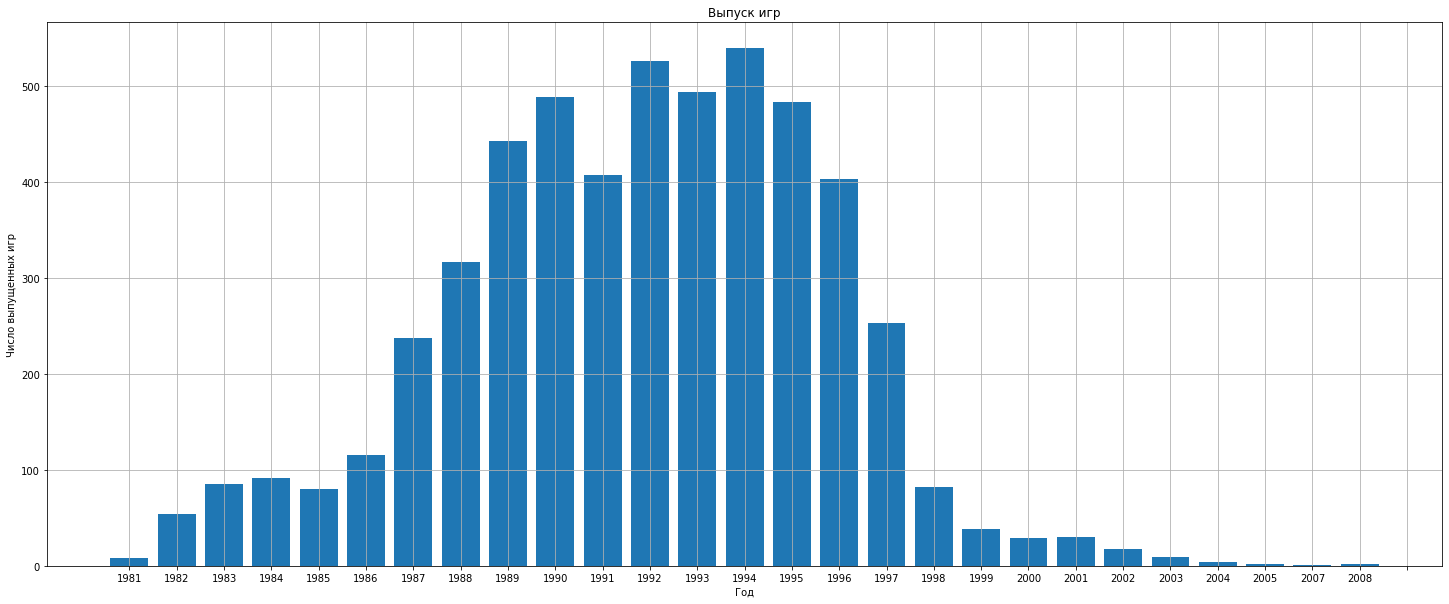

In [279]:
import matplotlib.pyplot as plt
import numpy as np

y = [count for count in game_count]
x = [year for year in years]

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(0, len(group_list), 1)) 
ax.grid()

plt.bar(x,y)
plt.xlabel('Год')
plt.ylabel('Число выпущенных игр')
plt.title('Выпуск игр')
plt.show()

То есть, больше всего игр было выпущено в 1994 году

#### Какие жанры были популярны в различные периоды времени?

In [280]:
types = []
for i in range(len(df['Type'])):
  types.append(df['Type'][i])
types = set(types)
types = list(types)
types.sort()
types

['Action',
 'Adventure',
 'Arcade',
 'Educational',
 'Fighting',
 'Interactive Fiction',
 'Other',
 'Puzzle',
 'Quest',
 'RPG',
 'Racing',
 'Simulation',
 'Sports',
 'Strategy',
 'Tabletop']

In [281]:
game_count = []
for i in range(len(types)):
  game_count.append(0)

for i in range(len(df['Type'])):
  for j in range(len(game_count)):
    if df['Type'][i] == types[j]:
      game_count[j] += 1

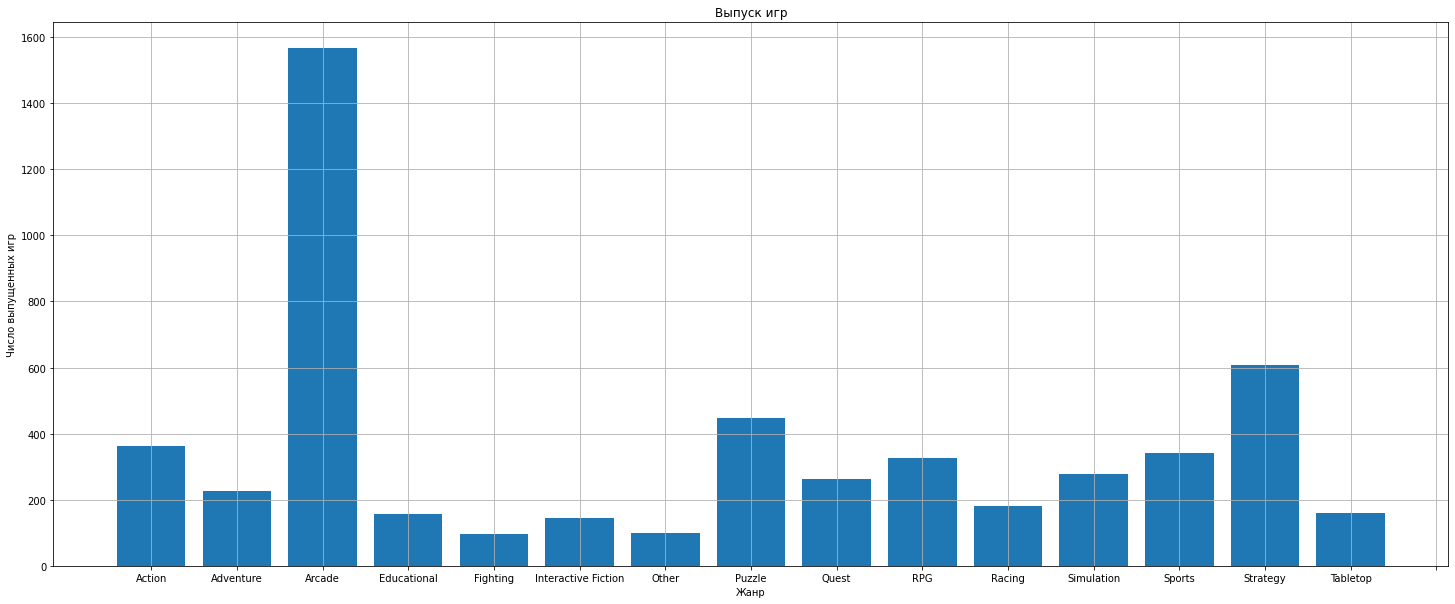

In [282]:
import matplotlib.pyplot as plt
import numpy as np

y = [count for count in game_count]
x = [typef for typef in types]

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(0, len(group_list), 1)) 
ax.grid()

plt.bar(x,y)
plt.xlabel('Жанр')
plt.ylabel('Число выпущенных игр')
plt.title('Выпуск игр')
plt.show()

То есть самая популярная аркада во все времена